# Sliding window filtering animation gif



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

plt.rcParams["figure.figsize"] = (20,15)

In [ ]:
# For this demonstration video, USE ONLY SIMETRIC FILTERS because the convoluiton is actually a cross-correlation
def get_filter(filter_type,length_fitler):
    if filter_type == 'mean' :
        return np.squeeze(np.ones(length_fitler))/length_fitler

def get_sliding_filter(i, filter, length_signal, length_fitler ):
    aux = np.hstack(( np.hstack(( np.zeros(i), filter )), np.zeros(length_signal-i-length_fitler) ))
    return aux/np.max(aux) 

In [ ]:
# # Signal with noise
# SNR = 5 # In Decibels
# original_frequency = 10 # In Hertz
# harmonic = 11
# # cutting_frequency (Hz) | length_filter = length_signal*W
# #         10                      497
# #         20                      250
# #         30                      167
# #         40                      125
# #         50                      100
# length_fitler = 250
# overlap = 0.75
# total_frames = total_frames = int(length_signal/((1-overlap)*length_fitler) )

# assert original_frequency/2 < length_signal, "Your highest signal frequency is too high for the sampling frequency..."
# assert length_fitler < length_signal, "The filter must be smaller than the signal!"
# assert total_frames < int(length_signal-length_fitler), "Can't make a video with more frames than step..."

In [ ]:
def signals():

    # Noisy signal
    np.random.seed(1)
    signal = np.random.rand(length_signal) + 10**(SNR/20)*( np.sin(np.linspace(0, 2* np.pi*original_frequency, length_signal))  + 0.35*np.sin(np.linspace(0, 2* np.pi*harmonic*original_frequency, length_signal)))
    signal = signal/np.max(signal)

    # Time 
    t = np.linspace(0,1,length_signal)

    # Defining and generating filter
    filter = get_filter('mean', length_fitler)

    # Convolved signal
    conv = np.convolve(signal,filter, 'valid')
    convolved = np.hstack((np.zeros( len(signal) - len(conv) ), conv)) 

    return t, signal, convolved, filter

def animate(i):

    ax1.clear()
    ax2.clear()

    t, signal, convolved, filter = signals()

    pos = int(np.ceil(length_fitler*(1-overlap)*i))

#     print('i: ' + str(i))
#     print('pos: ' + str(pos))
    
    legend_properties = {'weight':'bold', 'size':'x-large'}
    
    ax1.plot(t, signal, label = 'SNR: ' + str(SNR) + '\nfreqs= ['+ str(original_frequency)+', '+str(5*original_frequency)+'] Hz')
    try:
        window = get_sliding_filter( pos, filter, length_signal, length_fitler )
    except:
        window = get_sliding_filter(  length_signal-length_fitler, filter, length_signal, length_fitler )
    ax1.plot(t, window, 'r--', linewidth=3, label=str(length_fitler/length_signal)+' sec sliding window')
    ax2.plot(t, np.hstack(( convolved[:pos], np.zeros(length_signal - pos) )), linewidth = 4, label = 'Filtered signal')

    ax1.legend(loc='lower left',prop=legend_properties)
    ax2.legend(loc='lower left',prop=legend_properties)
    ax1.set_xlim(0, 1)
    ax2.set_xlim(0, 1)
    ax1.set_xlabel("Time (s)")
    ax2.set_xlabel("Time (s)")
    ax1.set_ylabel("Normalized Signals")
    ax2.set_ylabel("Signal Intensity")
    plt.tight_layout()

FileNotFoundError: [WinError 2] O sistema não pode encontrar o arquivo especificado

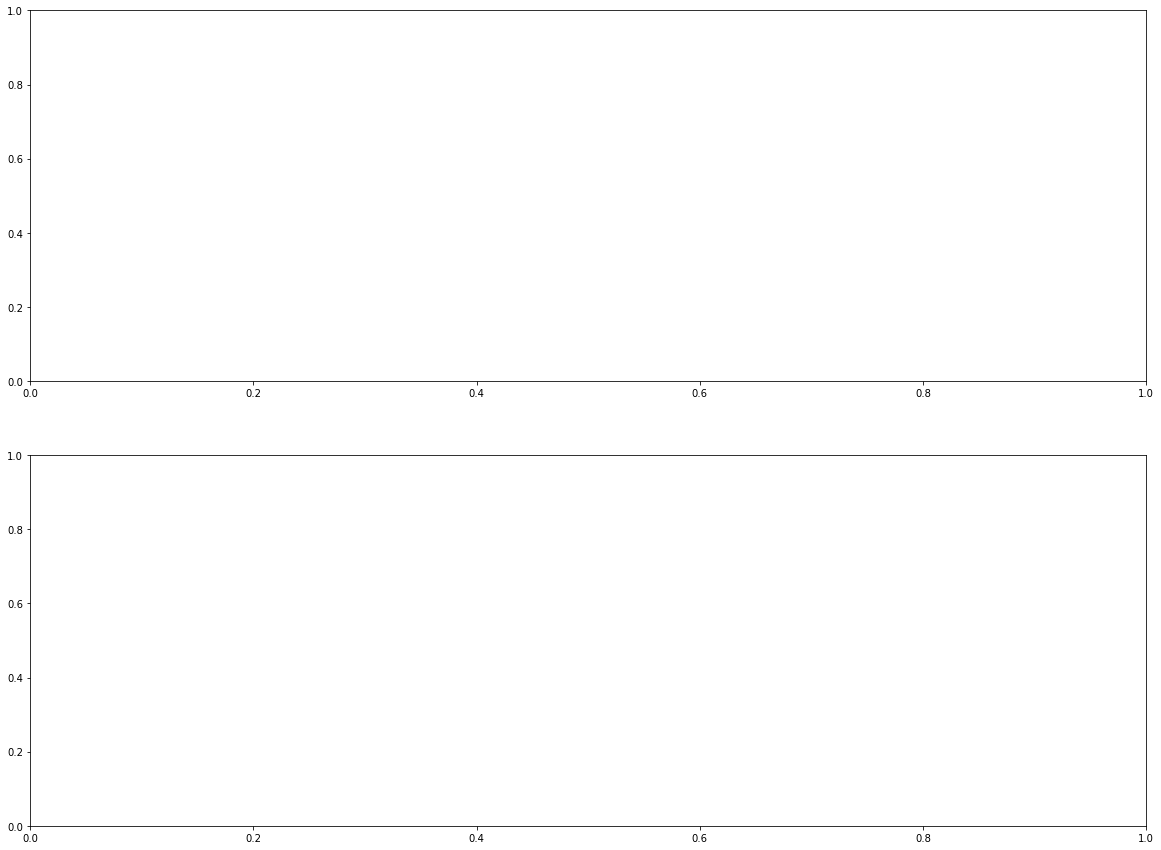

In [ ]:
# Some global variables to make things easier
global overlap, total_frames, length_signal, length_fitler, original_frequency, harmonic, SNR, filter

length_signal = 10*10**3

# SNR, Base Frequency, 35% Harmonic, Window Length, Overlap
combinations = [(20, 5, 13, 600, 0.75),
                (5, 10, 11, 250, 0.5),
                (5, 10, 11, 800, 0.75)]

for combination in combinations: 
    
    SNR = combination[0]
    original_frequency = combination[1]
    harmonic = combination[2]
    length_fitler = combination[3]
    overlap = combination[4]

    total_frames = total_frames = int(length_signal/((1-overlap)*length_fitler) )

    assert original_frequency/2 < length_signal, "Your highest signal frequency is too high for the sampling frequency..."
    assert length_fitler < length_signal, "The filter must be smaller than the signal!"
    assert total_frames < int(length_signal-length_fitler), "Can't make a video with more frames than step..."

    fig, (ax1, ax2) = plt.subplots(2,1)

    ani = FuncAnimation(fig, animate, total_frames, interval = 50, repeat = False)

    # Save the animation as an animated GIF
    ani.save( 'SNR_'+ str(SNR)+'freq_'+ str(original_frequency)+'harm_'+ str(harmonic)+'winlen_'+ str(length_fitler)+'overlap_'+ str(overlap)+".gif", dpi=300, writer=PillowWriter(fps=10))
    plt.close()